In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 12.0)

import os
import sys
import random
import math
import skimage.io
import matplotlib
import imgaug

# Root directory of the project
ROOT_DIR = os.path.abspath("./")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
# sys.path.append(os.path.join(ROOT_DIR, "coco/"))  # To find local version
import coco

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

Using TensorFlow backend.


Confiuration, Steps_per_epoch:  50


In [2]:
'''
dataDir='.'
dataType='train2017'
annFile='%s/annotations/instances_%s.json'%(dataDir,dataType)
# initialize COCO api for instance annotations
cocoDatasetAnn=COCO(annFile)

# get all images containing given categories, select one at random
catIds = cocoDatasetAnn.getCatIds(catNms=['person', 'car'] );
imgIds = cocoDatasetAnn.getImgIds(catIds=catIds );
img = cocoDatasetAnn.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
print("number of images filterd: ", len(imgIds))
img
'''

'\ndataDir=\'.\'\ndataType=\'train2017\'\nannFile=\'%s/annotations/instances_%s.json\'%(dataDir,dataType)\n# initialize COCO api for instance annotations\ncocoDatasetAnn=COCO(annFile)\n\n# get all images containing given categories, select one at random\ncatIds = cocoDatasetAnn.getCatIds(catNms=[\'person\', \'car\'] );\nimgIds = cocoDatasetAnn.getImgIds(catIds=catIds );\nimg = cocoDatasetAnn.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]\nprint("number of images filterd: ", len(imgIds))\nimg\n'

In [3]:
# print(imgIds[0])

In [4]:
# cocoAnns = cocoDatasetAnn.anns

In [5]:
# cocoKeys = cocoAnns.keys();

In [6]:
# for i in cocoKeys:
#     if(cocoAnns[i]['image_id']==imgIds[0]):
#        print(cocoAnns[i])

In [7]:
# cocoAnns[156]

In [8]:
# x = cocoDatasetAnn.loadImgs(imgIds)
# for i in x:
#     print(i['file_name'])
#     break

In [9]:
'''
import shutil
nr = 0
train_dir = os.path.join(ROOT_DIR, "images", "train2017")
val_dir = os.path.join(ROOT_DIR, "images", "val2017")
annotation_dir = os.path.join(ROOT_DIR, "images", "annotations")
f_train = open(os.path.join(ROOT_DIR, "images") + "instances_train2017.json", "a")
f_val = open(os.path.join(ROOT_DIR, "images") + "instances_val2017.json", "a")
# f.write("Now the file has more content!")
# f.close()
if(not os.path.exists(train_dir)):
    print("train directory Not exists")
    os.makedirs(train_dir)
else:
    os.rmdir(train_dir)  

if(not os.path.exists(val_dir)):
    print("val directory Not exists")
    os.makedirs(val_dir)
else:
    os.rmdir(val_dir)  
    
for imgID in cocoDatasetAnn.loadImgs(imgIds):
    src = os.path.join(ROOT_DIR,"train2017", imgID['file_name'])
    if nr <= 8:
        dst = os.path.join(ROOT_DIR, "images", "train2017", imgID['file_name'])
        f_train.write()
    elif nr > 8:
        dst = os.path.join(ROOT_DIR, "images", "val2017", imgID['file_name'])
    shutil.copy2(src, dst)
#     print(src)
#     print(dst)
    if nr >= 10:
        break
    nr += 1
'''

'\nimport shutil\nnr = 0\ntrain_dir = os.path.join(ROOT_DIR, "images", "train2017")\nval_dir = os.path.join(ROOT_DIR, "images", "val2017")\nannotation_dir = os.path.join(ROOT_DIR, "images", "annotations")\nf_train = open(os.path.join(ROOT_DIR, "images") + "instances_train2017.json", "a")\nf_val = open(os.path.join(ROOT_DIR, "images") + "instances_val2017.json", "a")\n# f.write("Now the file has more content!")\n# f.close()\nif(not os.path.exists(train_dir)):\n    print("train directory Not exists")\n    os.makedirs(train_dir)\nelse:\n    os.rmdir(train_dir)  \n\nif(not os.path.exists(val_dir)):\n    print("val directory Not exists")\n    os.makedirs(val_dir)\nelse:\n    os.rmdir(val_dir)  \n    \nfor imgID in cocoDatasetAnn.loadImgs(imgIds):\n    src = os.path.join(ROOT_DIR,"train2017", imgID[\'file_name\'])\n    if nr <= 8:\n        dst = os.path.join(ROOT_DIR, "images", "train2017", imgID[\'file_name\'])\n        f_train.write()\n    elif nr > 8:\n        dst = os.path.join(ROOT_DIR,

In [10]:
config = coco.CocoConfig()
model = modellib.MaskRCNN(mode="training", config=config,
                                  model_dir=MODEL_DIR)

In [11]:
# Select weights file to load
last_weights = True #False if you want to discard last time training
if last_weights == True:
    weights_path = model.find_last()
    model.load_weights(weights_path, by_name=True)
else:
    weights_path = COCO_MODEL_PATH
    model.load_weights(weights_path, by_name=True, exclude=["mrcnn_bbox_fc", "mrcnn_class_logits", "mrcnn_mask"])

In [12]:
#Data set
dataset_train = coco.CocoDataset()
train_dataset_dir = os.path.join(ROOT_DIR, "images")
dataset_train.load_coco(dataset_dir=ROOT_DIR, subset="train", year="2017", class_ids=[1,3])
dataset_train.prepare()
augmentation = imgaug.augmenters.Fliplr(0.5)

loading annotations into memory...
Done (t=17.27s)
creating index...
index created!


In [13]:
print(dataset_train.class_names)
print(dataset_train.num_images)

['BG', 'person', 'car']
67847


In [14]:
# Validation dataset
dataset_val = coco.CocoDataset()
val_type = "val"
val_dataset_dir = os.path.join(ROOT_DIR, "images")
dataset_val.load_coco(ROOT_DIR, val_type, year="2017", class_ids=[1,3])
dataset_val.prepare()

loading annotations into memory...
Done (t=1.40s)
creating index...
index created!


In [15]:
dataset_val.num_images

2869

In [16]:
model.train(dataset_train, dataset_val,
                    learning_rate=config.LEARNING_RATE,
                    epochs=1,
                    layers='5+'
           )#,augmentation=augmentation)


Starting at epoch 0. LR=0.001

Checkpoint Path: /home/aazmi/Documents/MSC INF/Spring2019/cs231nProject/logs/coco20190702T0307/mask_rcnn_coco_{epoch:04d}.h5
Selecting layers to train
res5a_branch2a         (Conv2D)
bn5a_branch2a          (BatchNorm)
res5a_branch2b         (Conv2D)
bn5a_branch2b          (BatchNorm)
res5a_branch2c         (Conv2D)
res5a_branch1          (Conv2D)
bn5a_branch2c          (BatchNorm)
bn5a_branch1           (BatchNorm)
res5b_branch2a         (Conv2D)
bn5b_branch2a          (BatchNorm)
res5b_branch2b         (Conv2D)
bn5b_branch2b          (BatchNorm)
res5b_branch2c         (Conv2D)
bn5b_branch2c          (BatchNorm)
res5c_branch2a         (Conv2D)
bn5c_branch2a          (BatchNorm)
res5c_branch2b         (Conv2D)
bn5c_branch2b          (BatchNorm)
res5c_branch2c         (Conv2D)
bn5c_branch2c          (BatchNorm)
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5             

/home/aazmi/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/aazmi/anaconda3/lib/python3.6/site-packages/keras/engine/training_generator.py:47: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/1
50/50 [==============================] - 412s 8s/step - loss: 1.7470 - rpn_class_loss: 0.1284 - rpn_bbox_loss: 0.3811 - mrcnn_class_loss: 0.2534 - mrcnn_bbox_loss: 0.4878 - mrcnn_mask_loss: 0.4962 - val_loss: 1.2098 - val_rpn_class_loss: 0.0256 - val_rpn_bbox_loss: 0.3330 - val_mrcnn_class_loss: 0.1275 - val_mrcnn_bbox_loss: 0.4398 - val_mrcnn_mask_loss: 0.2839


In [10]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()

In [11]:
# Create model object in inference mode.
model_infer = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

trained_model_path = model_infer.find_last()
print("model path: ", trained_model_path)

# Load weights trained last time
model_infer.load_weights(trained_model_path, by_name=True)

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
model path:  /home/aazmi/Documents/MSC INF/Spring2019/cs231nProject/logs/coco20190702T0307/mask_rcnn_coco_0001.h5
Re-starting from epoch 1


In [12]:
class_names = ['BG', 'person', 'car']
len(class_names)

3

Processing 1 images
image                    shape: (426, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


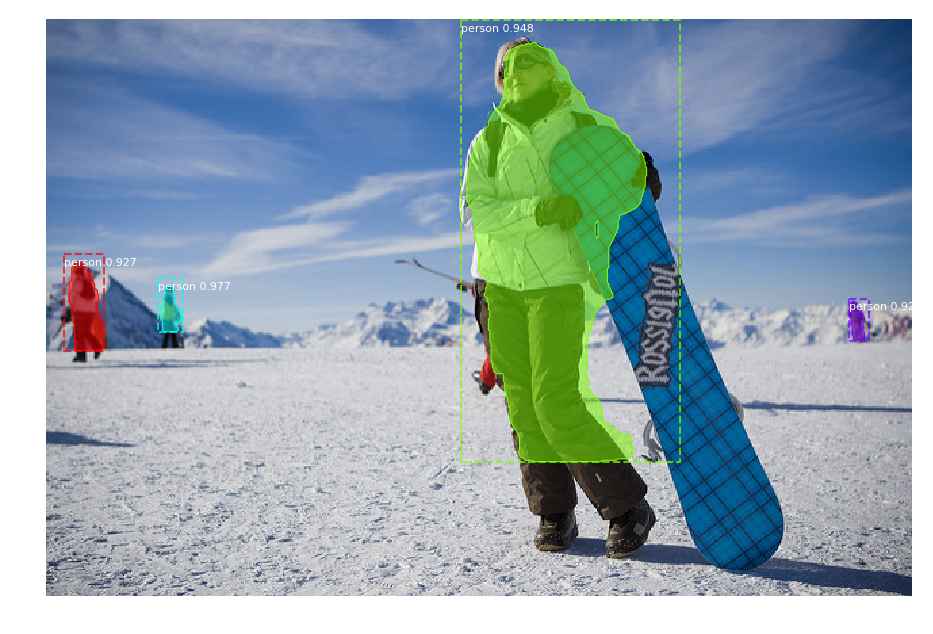

In [15]:
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

# Run detection
results = model_infer.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])